# Explore here

In [6]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.iloc[200:300]



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
200,53470,Clean and convenient 2BR apartment,204539,Mark,Queens,Ridgewood,40.70234,-73.89816,Private room,140,7,6,2015-10-08,0.06,5,365
201,53477,3 floors of luxury!,204539,Mark,Queens,Middle Village,40.71546,-73.87854,Entire home/apt,265,7,38,2019-04-27,0.38,5,365
202,54158,The Institute—Heart of Williamsburg,10889,Bob,Brooklyn,Williamsburg,40.71950,-73.95976,Entire home/apt,249,2,358,2019-06-20,3.44,2,164
203,54453,MIDTOWN WEST - Large alcove studio,255583,Anka,Manhattan,Hell's Kitchen,40.76548,-73.98474,Shared room,105,6,10,2014-01-07,0.09,1,363
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,68403,The Cozy Brownstone Inn (discount)!,240427,Naimah,Brooklyn,Bedford-Stuyvesant,40.68300,-73.91981,Entire home/apt,145,3,127,2019-06-24,1.25,2,72
296,68735,Prewar Penthouse w Private Terrace,342054,Violetta,Manhattan,Upper West Side,40.78971,-73.97290,Entire home/apt,195,11,30,2019-06-13,0.32,1,249
297,68765,Designer 2.5 BR Loft in Carroll Gardens by Subway,282655,Jenna,Brooklyn,Carroll Gardens,40.67817,-73.99495,Entire home/apt,250,2,106,2019-06-27,1.34,3,272
298,68900,Bright Beautiful Brooklyn,343250,Jason,Brooklyn,Greenpoint,40.73119,-73.95578,Private room,125,3,6,2016-11-13,0.10,1,325


In [2]:
# what is the most expensive room

most_expensive_room = data.loc[data["price"].idxmax()]

print(f'The most expensive room is "{most_expensive_room["name"]}" located in {most_expensive_room["neighbourhood_group"]}, {most_expensive_room["neighbourhood"]}. It costs {most_expensive_room["price"]} USD per night.')

The most expensive room is "Furnished room in Astoria apartment" located in Queens, Astoria. It costs 10000 USD per night.


In [7]:
# How many guests whose names starts with J stayed in the most expensive room
 
most_expensive_room = data.loc[data["price"].idxmax()]
guests_with_j = data[(data["room_type"] == most_expensive_room["room_type"]) & (data["name"].str.startswith("J"))]
num_guests = len(guests_with_j)
print(f"{num_guests} guests whose names start with 'J' stayed in the most expensive room.")

91 guests whose names start with 'J' stayed in the most expensive room.


In [ ]:
# What is the most popular neighbourhood based on the amount of reviews per month

popular_neighborhood = data.groupby("neighbourhood")["reviews_per_month"].sum()
most_popular = popular_neighborhood.idxmax()
highest_reviews = popular_neighborhood.max()
print(f'The most popular neighborhood based on reviews per month is {most_popular}, with {highest_reviews} total reviews per month.')

The most popular neighborhood based on reviews per month is Bedford-Stuyvesant, with 4874.52 total reviews per month.


In [ ]:
top_hosts = data.groupby("host_name")["calculated_host_listings_count"].sum().sort_values(ascending=False)
print(top_hosts.head(10)) 

host_name
Sonder (NYC)         106929
Blueground            53824
Kara                  14679
Kazuya                10609
Jeremy & Laura         9216
Sonder                 9216
Corporate Housing      8281
Ken                    7645
Pranjal                4225
Mike                   2910
Name: calculated_host_listings_count, dtype: int64


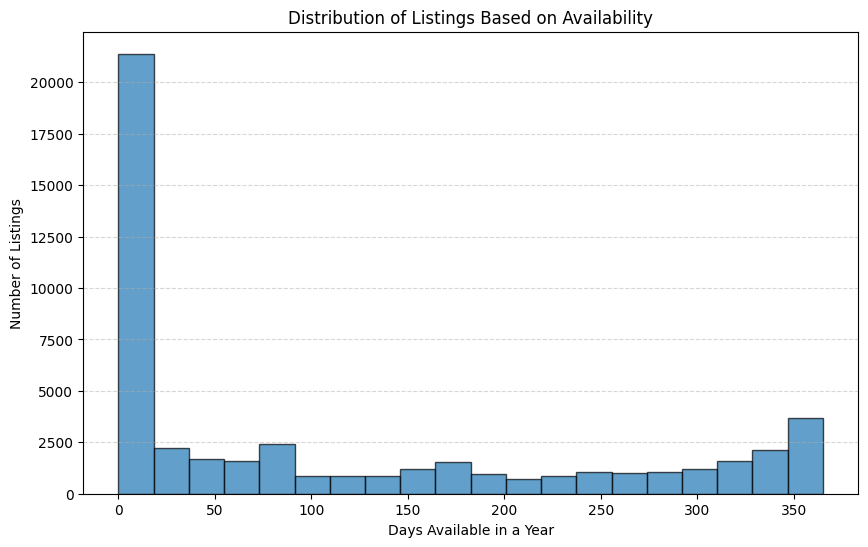

In [8]:
# Availability & Demand

import matplotlib.pyplot as plt

# Plot histogram of availability across all listings
plt.figure(figsize=(10, 6))
plt.hist(data["availability_365"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Days Available in a Year")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings Based on Availability")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

